In [198]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [199]:
f = './govee.csv'
with open(f) as rfp:
    data = [line.rstrip().split(',') for line in rfp]

In [200]:
header = ['time', 'temp', 'rh']
data = np.array(data[1:])

In [201]:
time = np.array([datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in data[:, 0]])
doy = np.array([datetime.strftime(t, '%j') for t in time]).astype(np.int)
temp = np.array(data[:, 1]).astype(np.float)

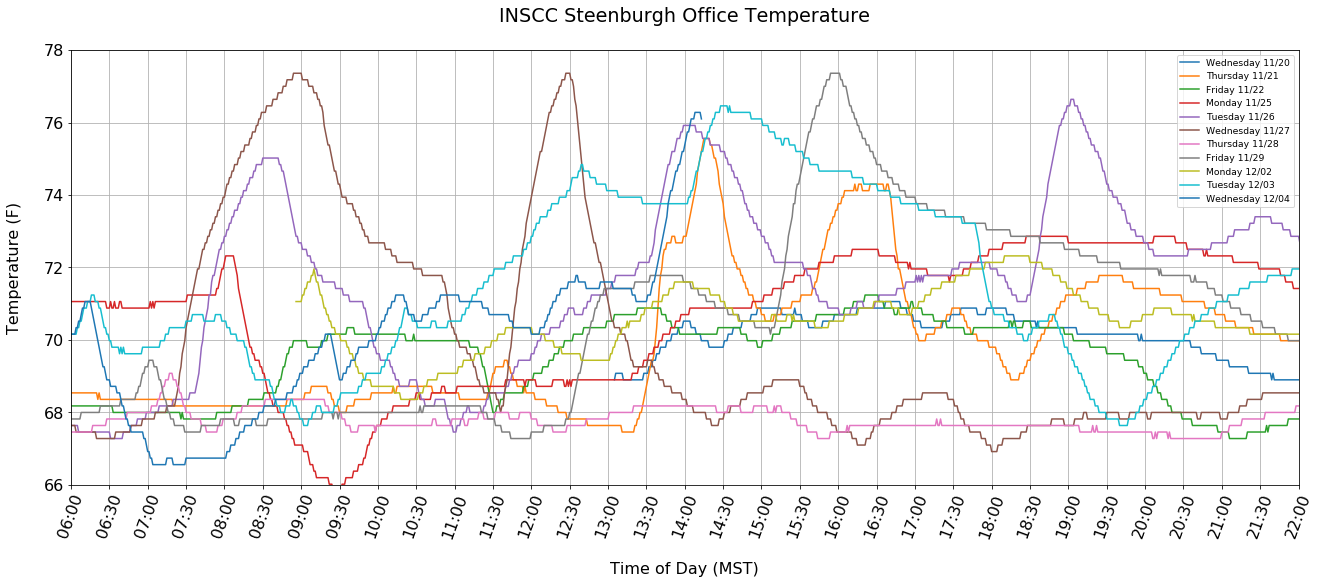

In [202]:
plt.rcParams.update({'font.size': 16})
numdays = np.unique(doy).size
fig, ax = plt.subplots(1, 1, figsize=(22, 8), facecolor='w')

for i, d in enumerate(np.unique(doy)):
    
    dow = datetime.strptime('2019 '+str(d), '%Y %j').strftime('%A')
    dom = datetime.strptime('2019 '+str(d), '%Y %j').strftime('%m/%d')
    
    if dow not in ['Saturday', 'Sunday']:
        idx = np.where(doy == d)[0]
        itime = np.array([datetime.strptime(datetime.strftime(t, '20190101%H:%M'), '%Y%m%d%H:%M') for t in time[idx]])
        ax.plot(itime, temp[idx], label='%s %s'%(dow, dom))

        minutes = mdates.MinuteLocator(interval=30)
        m_fmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_locator(minutes)
        ax.xaxis.set_major_formatter(m_fmt)
    
        ax.set_xticklabels([])
        ax.set_xlim([datetime(2019, 1, 1, 6), datetime(2019, 1, 1, 22)])
        ax.set_ylim([66, 78])

        ax.set_yticks([66, 68, 70, 72, 74, 76, 78])
        ax.set_yticklabels([66, 68, 70, 72, 74, 76, 78])
        
        ax.set_xlabel('\nTime of Day (MST)')
        ax.set_ylabel('Temperature (F)\n')
        ax.set_title('INSCC Steenburgh Office Temperature\n')
                       
        minutes = mdates.MinuteLocator(interval=30)
        m_fmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_locator(minutes)
        ax.xaxis.set_major_formatter(m_fmt)
        plt.xticks(rotation=70)
        
    ax.legend(fontsize='xx-small')
    ax.grid(True)
        
plt.show()

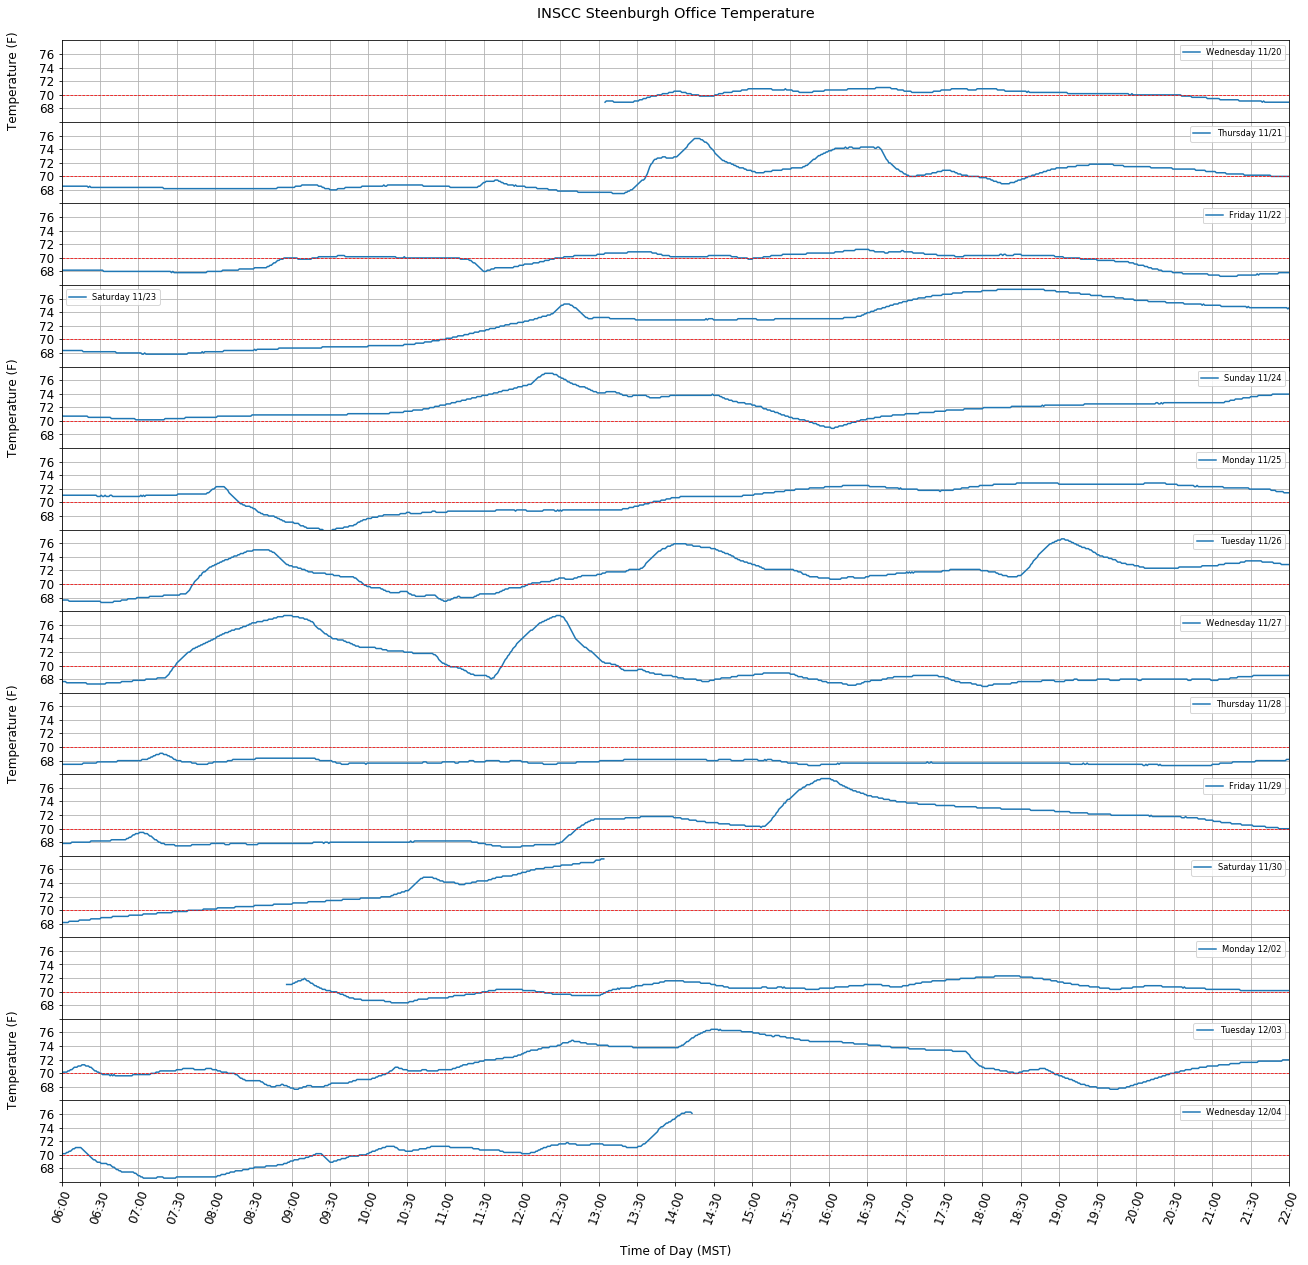

In [203]:
plt.rcParams.update({'font.size': 12})
numdays = np.unique(doy).size
fig, axs = plt.subplots(numdays, 1, figsize=(22, 1.5*numdays), facecolor='w')
fig.subplots_adjust(hspace=0)
axs = axs.flatten()

for i, d in enumerate(np.unique(doy)):
    ax = axs[i]
    plt.sca(ax)
    
    dow = datetime.strptime('2019 '+str(d), '%Y %j').strftime('%A')
    dom = datetime.strptime('2019 '+str(d), '%Y %j').strftime('%m/%d')
    
    idx = np.where(doy == d)[0]
    itime = np.array([datetime.strptime(datetime.strftime(t, '20190101%H:%M'), '%Y%m%d%H:%M') for t in time[idx]])
    
    ax.plot(itime, temp[idx], label='%s %s'%(dow, dom))
    ax.axhline(70, linestyle='--', color='r', linewidth=0.75)

    minutes = mdates.MinuteLocator(interval=30)
    m_fmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(minutes)
    ax.xaxis.set_major_formatter(m_fmt)

    ax.set_xticklabels([])
    ax.set_xlim([datetime(2019, 1, 1, 6), datetime(2019, 1, 1, 22)])
    ax.set_ylim([66, 78])

    ax.set_yticks([66, 68, 70, 72, 74, 76])
    ax.set_yticklabels(['', 68, 70, 72, 74, 76])
    
    if i%4 == 0:
        ax.set_ylabel('Temperature (F)\n')

    if i == 0:
        ax.set_title('INSCC Steenburgh Office Temperature\n')
    elif i == numdays-1:
        ax.set_xlabel('\nTime of Day (MST)')
        minutes = mdates.MinuteLocator(interval=30)
        m_fmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_locator(minutes)
        ax.xaxis.set_major_formatter(m_fmt)
        plt.xticks(rotation=70)

    ax.legend(fontsize='x-small')
    ax.grid()
        
plt.show()